In [1]:
import pandas as pd

In [2]:
hyper_param = {
    "H": 230.67,  # la rigidité du ressort
    "ya0": [
        0.0025,
        0.0125,
        # 0.00375,
        # 0.00625,
        # 0.00875,
    ],  # la position initiale du ressort
    "m": 1.57,  # la masse du ressort
    "file": [
        "data_john_1_case_2.csv",
        "data_john_3_case_2.csv",
        'data_john_6_case_2.csv',
        'data_john_8_case_2.csv',
    ],
    "nb_epoch": 1000,  # epoch number
    "save_rate": 20,  # rate to save
    "dynamic_weights": True,
    "lr_weights": 1e-1,  # si dynamic weights
    "weight_data": 1.0,
    "weight_pde": 1.0,
    "weight_border": 1.0,
    "batch_size": 10000,  # for the pde
    "nb_points_pde": 1000000,  # Total number of pde points
    "Re": 100,
    "lr_init": 0.001,
    "gamma_scheduler": 0.999,  # pour la lr
    "nb_layers": 2,
    "nb_neurons": 32,
    "n_pde_test": 5000,
    "n_data_test": 5000,
    "nb_points_axes": 12,  # le nombre de points pris par axe par pas de temps
    "x_min": -0.1,
    "x_max": 0.1,
    "y_min": -0.06,
    "y_max": 0.06,
    "t_min": 6.5,
    "t_max": 8,
    "nb_points_close_cylinder": 50,  # le nombre de points proches du cylindre
    "nb_points_border": 25,  # le nombrede points sur la condition init
}

param_adim = {"V": 1.0, "L": 0.025, "rho": 1.2}



In [3]:
for k in range(4):
    # df = pd.read_csv("25_pinns_surrogate/" + "data/" +hyper_param["file"][k])
    df = pd.read_csv("data/" + hyper_param["file"][k])
    df = df.iloc[:50000, :]
    df.to_csv("data/" + hyper_param["file"][k][:-4] + '_test.csv')

## On cherche à charger les données ici pour les regarder 

In [3]:
from utils import charge_data

In [4]:
hyper_param = {
    "H": 230.67,  # la rigidité du ressort
    "ya0": [
        0.0025,
        0.0125,
        0.00375,
        0.00625,
        0.00875,
    ],  # la position initiale du ressort
    "m": 1.57,  # la masse du ressort
    "file": [
        "data_john_2_case_2.csv",
        "data_john_4_case_2.csv",
        'data_john_5_case_2.csv',
        'data_john_7_case_2.csv',
        "data_john_9_case_2.csv",
    ],
    "nb_epoch": 1000,  # epoch number
    "save_rate": 20,  # rate to save
    "dynamic_weights": True,
    "lr_weights": 1e-1,  # si dynamic weights
    "weight_data": 1.0,
    "weight_pde": 1.0,
    "weight_border": 1.0,
    "batch_size": 10000,  # for the pde
    "nb_points_pde": 1000000,  # Total number of pde points
    "Re": 100,
    "lr_init": 0.001,
    "gamma_scheduler": 0.999,  # pour la lr
    "nb_layers": 15,
    "nb_neurons": 64,
    "n_pde_test": 5000,
    "n_data_test": 5000,
    "nb_points": 12*12,  # le nombre de points pris par axe par pas de temps
    "x_min": -0.1,
    "x_max": 0.1,
    "y_min": -0.06,
    "y_max": 0.06,
    "t_min": 6.5,
    "t_max": 8,
    "nb_points_close_cylinder": 50,  # le nombre de points proches du cylindre
    "nb_points_border": 25,  # le nombrede points sur la condition init
}

param_adim = {"V": 1.0, "L": 0.025, "rho": 1.2}

In [7]:
X_train, U_train, X_full, U_full, X_border, X_border_test, mean_std = charge_data(hyper_param, param_adim)

fichier n°0 chargé
fichier n°1 chargé
fichier n°2 chargé
fichier n°3 chargé
fichier n°4 chargé
Starting X_train
Simu n°0/5
Time:8.998
Simu n°1/5
Time:24.095
Simu n°2/5
Time:38.093
Simu n°3/5
Time:54.200
Simu n°4/5
Time:67.196
X_train OK
X_border OK


In [8]:
X_train.shape

torch.Size([59170, 4])

In [10]:
for k, ya0 in enumerate(X_train[:, 3].unique()):
    masque = X_train[:, 3] == ya0
    print(ya0)
    print(X_train[masque].shape)

tensor(-1.1838)
torch.Size([11834, 4])
tensor(-0.8355)
torch.Size([11834, 4])
tensor(-0.1390)
torch.Size([11834, 4])
tensor(0.5576)
torch.Size([11834, 4])
tensor(1.6025)
torch.Size([11834, 4])


In [12]:
for k, ya0 in enumerate(X_border[:, 3].unique()):
    masque = X_border[:, 3] == ya0
    print(ya0)
    print(X_border[masque].shape)

tensor(0.0025)
torch.Size([1525, 4])
tensor(0.0037)
torch.Size([1525, 4])
tensor(0.0063)
torch.Size([1525, 4])
tensor(0.0088)
torch.Size([1525, 4])
tensor(0.0125)
torch.Size([1525, 4])


In [14]:
import matplotlib.pyplot as plt

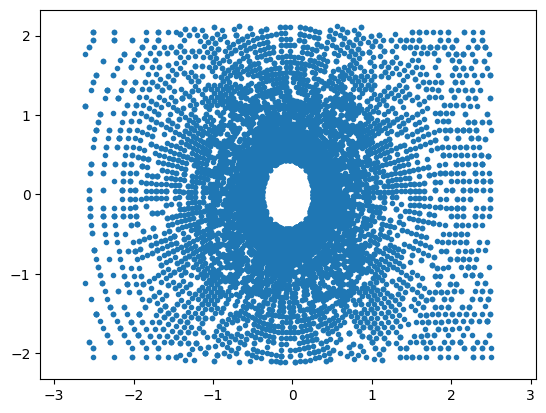

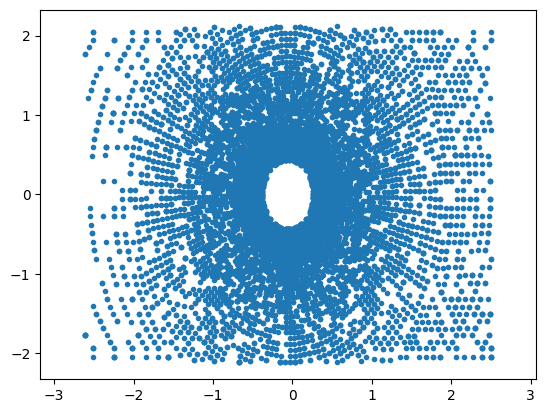

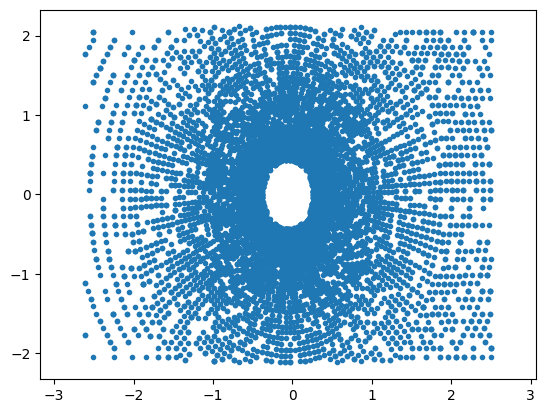

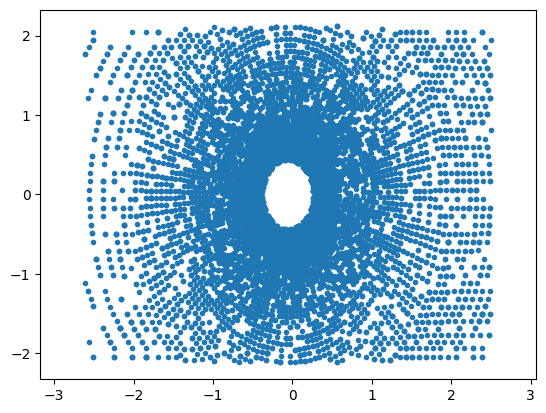

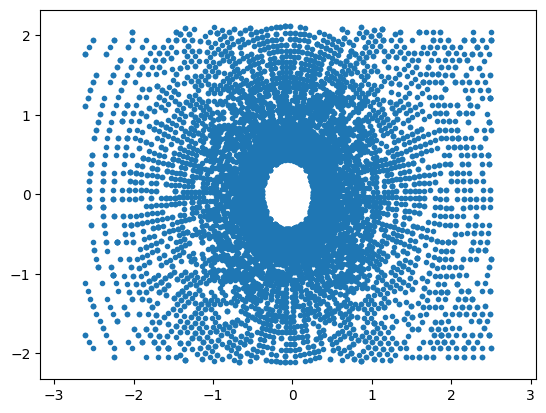

In [27]:
for k, ya0 in enumerate(X_train[:, 3].unique()):
    masque = X_train[:, 3] == ya0
    plt.scatter(X_train[masque][:, 0], X_train[masque][:, 1], marker = '.')
    plt.axis('equal')
    plt.show()

In [20]:
from geometry import RectangleWithoutCylinder

In [23]:
import torch

In [24]:
rectangle = RectangleWithoutCylinder(
    x_max=X_full[:, 0].max(),
    y_max=X_full[:, 1].max(),
    t_min=X_full[:, 2].min(),
    t_max=X_full[:, 2].max(),
    x_min=X_full[:, 0].min(),
    y_min=X_full[:, 1].min(),
    x_cyl=0.0,
    y_cyl=0.0,
    r_cyl=0.025 / 2,
    mean_std=mean_std,
    param_adim=param_adim,
)
nb_simu = 5
X_pde = torch.empty((hyper_param["nb_points_pde"] *nb_simu, 4))
for k in range(nb_simu):
    X_pde_without_param = torch.concat(
        (
            rectangle.generate_lhs(hyper_param["nb_points_pde"]),
            hyper_param["ya0"][k]
            * torch.ones(hyper_param["nb_points_pde"]).reshape(-1, 1),
        ),
        dim=1,
    )
    X_pde[
        k
        * hyper_param["nb_points_pde"] : (k + 1)
        * hyper_param["nb_points_pde"]
    ] = X_pde_without_param
indices = torch.randperm(X_pde.size(0))
X_pde = X_pde[indices, :].detach()

In [25]:
for k, ya0 in enumerate(X_pde[:, 3].unique()):
    masque = X_pde[:, 3] == ya0
    print(ya0)
    print(X_pde[masque].shape)

tensor(0.0025)
torch.Size([1000000, 4])
tensor(0.0037)
torch.Size([1000000, 4])
tensor(0.0063)
torch.Size([1000000, 4])
tensor(0.0088)
torch.Size([1000000, 4])
tensor(0.0125)
torch.Size([1000000, 4])


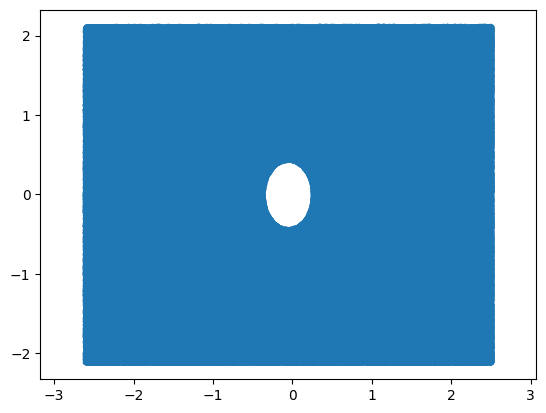

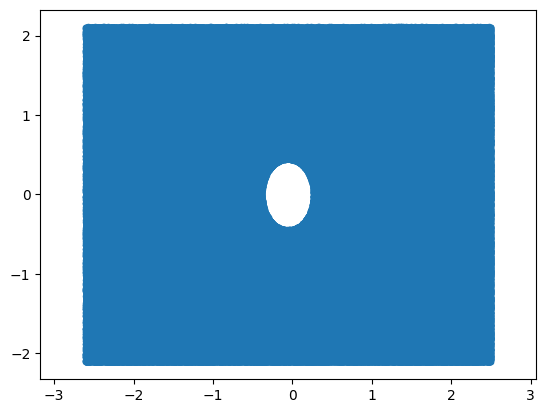

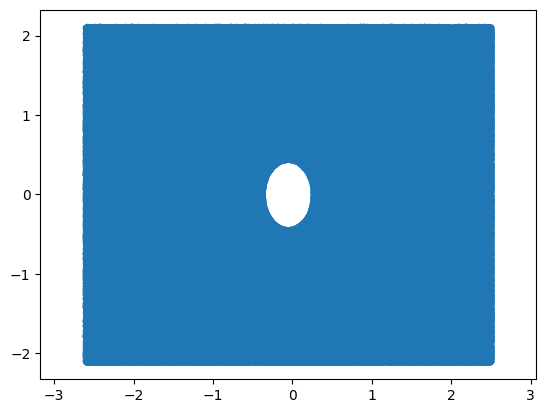

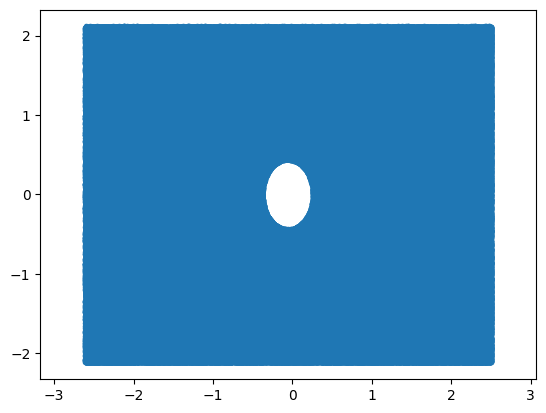

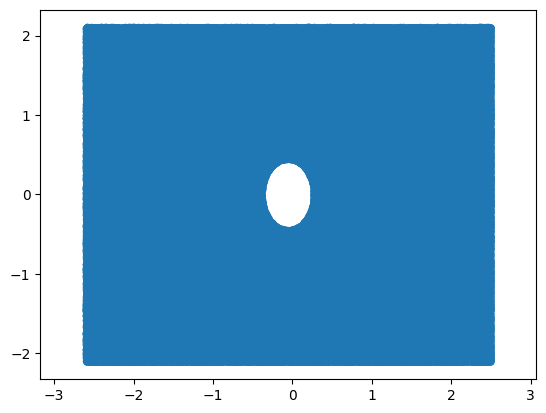

In [26]:
for k, ya0 in enumerate(X_pde[:, 3].unique()):
    masque = X_pde[:, 3] == ya0
    plt.scatter(X_pde[masque][:, 0], X_pde[masque][:, 1], marker = '.')
    plt.axis('equal')
    plt.show()

In [1]:
from plot_results import plot_loss, plot_loss_decompose

FileNotFoundError: [Errno 2] No such file or directory: '/home/onyxia/work/25_pinns_surrogate/test/piche.png'

<Figure size 640x480 with 0 Axes>

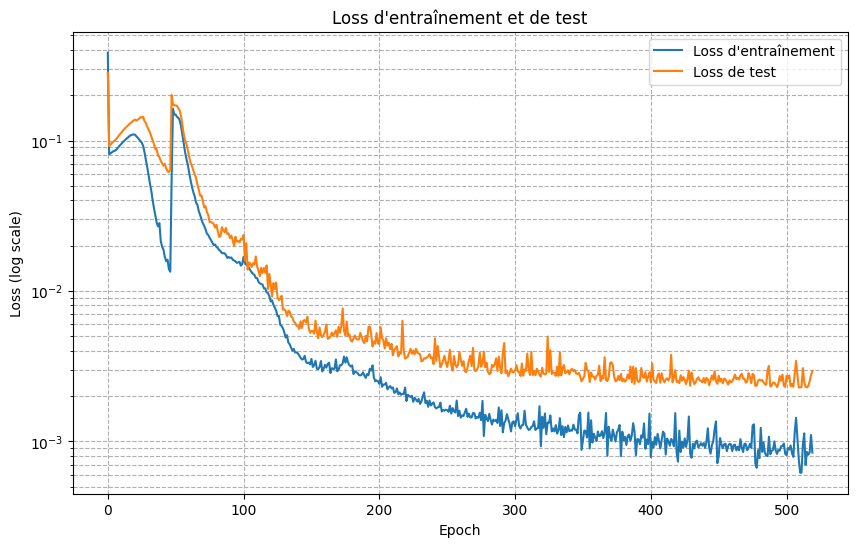

In [3]:
plot_loss('test', "results/first_try3/epoch520", 'piche')